In [37]:
import numpy as np 
import pandas as pd 

df = pd.read_csv(r'C:\Users\Arun JH\Desktop\vaibhavi-proj\Email_ML\spam.csv', sep =',', encoding = 'latin1')
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


DATA CLEANING

In [39]:
#Dropping the cols 
df.drop(columns={'Unnamed: 2','Unnamed: 3','Unnamed: 4'}, inplace =True)

In [40]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace = True)
df.sample(5)

,target,text
3588,ham,I've sent my wife your text. After we buy them...
884,ham,Yoyyooo u know how to change permissions for a...
289,ham,"Dear,shall mail tonite.busy in the street,shal..."
3801,ham,No da. I am happy that we sit together na
3331,ham,Ok... The theory test? when are Ì_ going to bo...


In [41]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [42]:
print(df.isnull().sum())     #to find missing values 
print(df.duplicated().sum()) # to find duplicates 

target    0
text      0
dtype: int64
403


In [43]:
#to remove duplicates 
df= df.drop_duplicates(keep = 'first')
print(df.duplicated().sum())
print(df.shape)

0
(5169, 2)


EDA

In [44]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

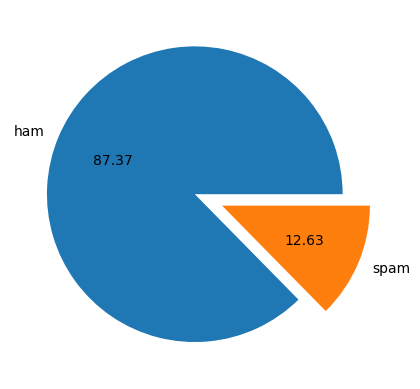

In [45]:
import matplotlib.pyplot as plt 

plt.pie(df['target'].value_counts(), labels = ['ham','spam'],explode =[0 , 0.2],autopct ="%0.2f")
plt.show()


In [46]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Arun
[nltk_data]     JH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [47]:
df['num_char'] = df['text'].apply(len)
df.head()


,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# to fetch the number of words
import re

df['num_words'] = df['text'].apply(lambda x: len(re.findall(r'\b\w+\b', x)))
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14


In [60]:
df['num_senten'] = df['text'].apply(lambda x: len(re.findall(r'[.!?]+', x)))
df.head()

,target,text,num_char,num_words,num_senten
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33,1
3,0,U dun say so early hor... U c already then say...,49,11,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,0


<Axes: xlabel='num_char', ylabel='Count'>

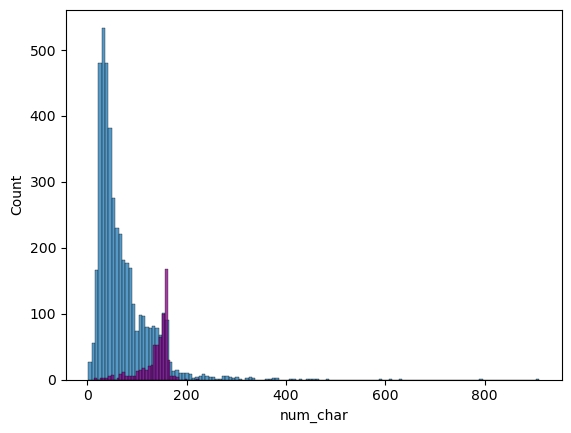

In [ ]:
#spotting the difference between the ham and spam messages 
import seaborn as sns 

sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'], color= 'purple')


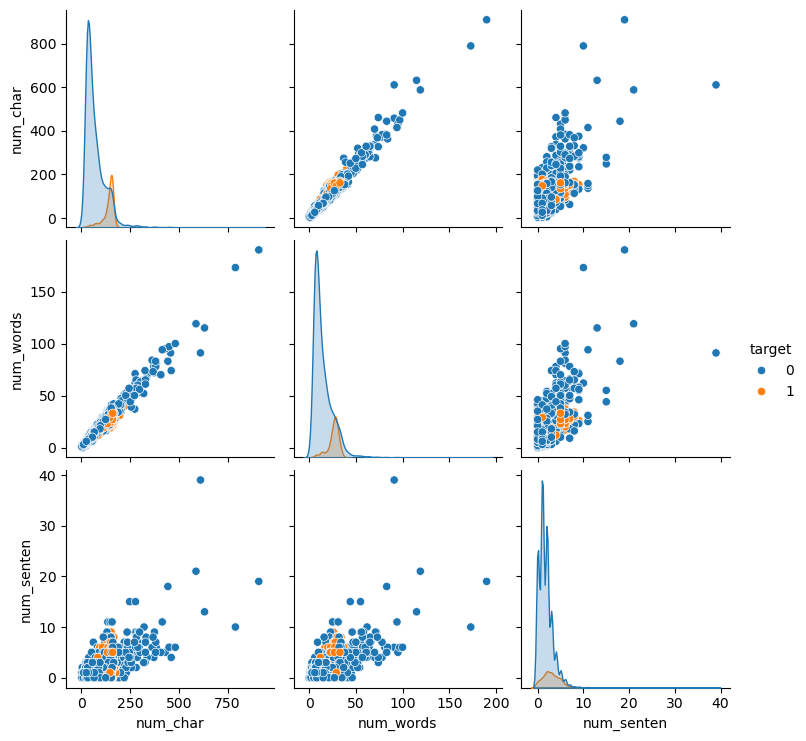

In [64]:
# to find the relationship 
sns.pairplot(df, hue ='target')

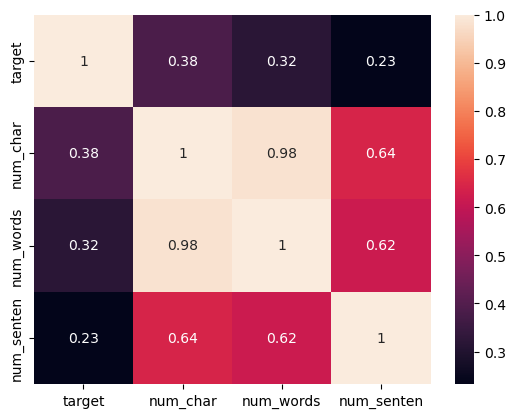

In [69]:
numeric_df = df.select_dtypes(include = 'number')
sns.heatmap(numeric_df.corr(), annot =True)
plt.show()